In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns

In [8]:

# Load the Boston Housing dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.boston_housing.load_data()


In [10]:
# Data Preprocessing and Cleansing
# 1. Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
# Create a neural network model for regression
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [16]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 591.1889 - mae: 22.2244 - val_loss: 603.9940 - val_mae: 22.8119
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 539.7598 - mae: 21.2906 - val_loss: 570.3735 - val_mae: 22.1183
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 483.9863 - mae: 20.1955 - val_loss: 530.3278 - val_mae: 21.2480
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 429.7601 - mae: 18.9531 - val_loss: 476.0531 - val_mae: 20.0055
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 377.7527 - mae: 17.5746 - val_loss: 406.1317 - val_mae: 18.2763
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 330.0594 - mae: 16.3090 - val_loss: 324.6647 - val_mae: 16.0258
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 250.4689 - mae: 13.7669 - val_loss: 243.2145 - val_mae: 13.3296
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 159.2144 - mae: 10.5995 - val_loss: 169.6841 - val_mae: 10.3429
Epoch 9/

In [18]:
# Make predictions
y_pred = model.predict(X_test)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [20]:
# Calculate regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [22]:
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R2): {r2:.3f}")


Mean Squared Error (MSE): 25.286
Mean Absolute Error (MAE): 3.176
R-squared (R2): 0.696


In [24]:
# Calculate entropy
def calculate_entropy(values):
    _, counts = np.unique(values, return_counts=True)
    probabilities = counts / len(values)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy


In [26]:
# Calculate entropy and information gain based on residuals
residuals = np.abs(y_test - y_pred.flatten())
entropy_before = calculate_entropy(y_test)
entropy_after = calculate_entropy(residuals)
information_gain = entropy_before - entropy_after

In [28]:

print(f'Entropy before: {entropy_before:.3f}')
print(f'Entropy after: {entropy_after:.3f}')
print(f'Information Gain: {information_gain:.3f}')


Entropy before: 6.187
Entropy after: 6.672
Information Gain: -0.485


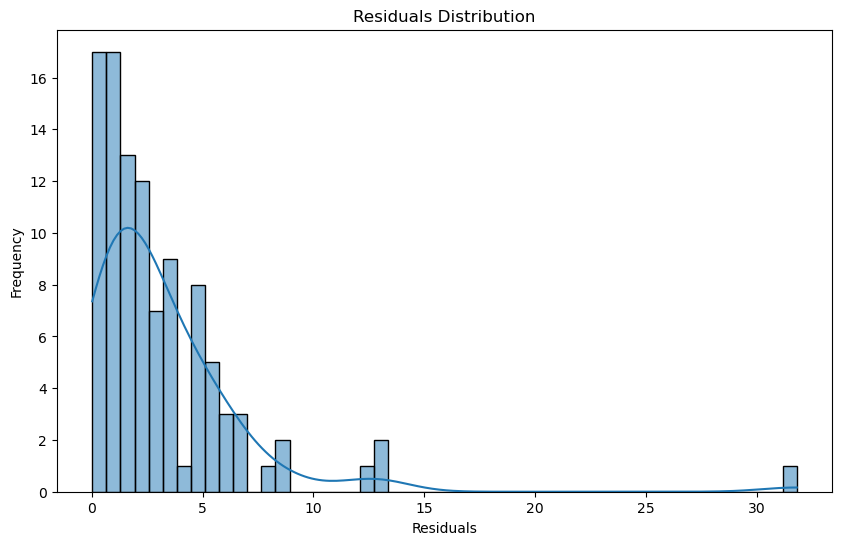

In [30]:
# Visualize residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.show()

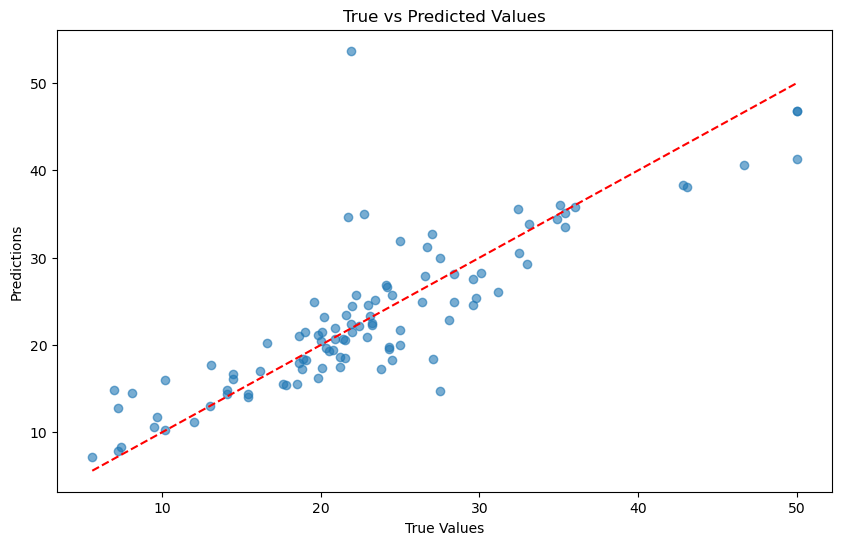

In [32]:
# Plot true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

In [34]:
# Print first 10 predictions for comparison
print("First 10 predictions vs true values:")
for i in range(10):
    print(f"True: {y_test[i]}, Predicted: {y_pred[i][0]}")

First 10 predictions vs true values:
True: 7.2, Predicted: 7.900519371032715
True: 18.8, Predicted: 17.23892593383789
True: 19.0, Predicted: 21.492341995239258
True: 27.0, Predicted: 32.68899154663086
True: 22.2, Predicted: 25.75341033935547
True: 24.5, Predicted: 18.244640350341797
True: 31.2, Predicted: 26.047847747802734
True: 22.9, Predicted: 20.93539047241211
True: 20.5, Predicted: 19.26573371887207
True: 23.2, Predicted: 22.242107391357422
